In [ ]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('/Users/varunbhavnani/Downloads/Technical exam data.csv')

In [ ]:
data.head(100)

In [3]:
data['Cohort'] = pd.to_datetime(data['START_DATE'])
data['Cohort'] = data['Cohort'].dt.strftime('%B %Y')

In [ ]:
data.groupby(['CARRIER_NAME'])['CARRIER_NAME'].count()

In [4]:
df = data[['Cohort','MEMBERS','MAX_DURATION','STATE','CARRIER_NAME','START_DATE','CHURN_DATE']]

In [ ]:
df.dtypes

In [5]:
df['Cohort end date'] = pd.to_datetime(df['START_DATE']) + pd.DateOffset(months=1)

/var/folders/j2/9frmypq12fj32dw3sv8_k2r80000gn/T/ipykernel_3439/3811803740.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cohort end date'] = pd.to_datetime(df['START_DATE']) + pd.DateOffset(months=1)


In [ ]:
df.head(100)

In [ ]:
df.dtypes

In [6]:
df['CHURN_DATE'] = pd.to_datetime(df['CHURN_DATE'])

/var/folders/j2/9frmypq12fj32dw3sv8_k2r80000gn/T/ipykernel_3439/86322828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CHURN_DATE'] = pd.to_datetime(df['CHURN_DATE'])


In [7]:
import numpy as np

# Define the conditions to assign retention values
conditions = [
    (df['CHURN_DATE'] >= pd.to_datetime(df['Cohort']) - pd.DateOffset(months=1)) & (pd.to_datetime(df['START_DATE']) <= pd.to_datetime(df['Cohort'])+ pd.DateOffset(months=1)),
    (df['CHURN_DATE'] < pd.to_datetime(df['Cohort']) - pd.DateOffset(months=1)) & (pd.to_datetime(df['START_DATE']) > pd.to_datetime(df['Cohort'])+ pd.DateOffset(months=1))
]

# Define the values to assign for each condition
values = [1, 0]

# Create a new column and assign retention values using np.select()
df['retention'] = np.select(conditions, values)

In [8]:
df1 = df.groupby(['Cohort']).agg({'MEMBERS':['sum'],'retention':['sum']})
df1.columns = ['total active members', 'total retention']
df1 = df1.reset_index()

In [9]:
df1['Cohort date'] = pd.to_datetime(df1['Cohort'])
df1 = df1.sort_values('Cohort date')
# df1= df1.drop('Cohort date', axis=1)

In [ ]:
df1

In [10]:
df1['retained_ratio'] = df1['total retention'] / df1['total retention'].shift(1)

In [ ]:
df1

In [11]:
df1['cumulative retained_ratio'] = df1['total retention'] / df1['total active members']

In [12]:
df1

,Cohort,total active members,total retention,Cohort date,retained_ratio,cumulative retained_ratio
20,January 2015,11011,7065,2015-01-01,NaN,0.641631
15,February 2015,8385,5782,2015-02-01,0.818401,0.689565
35,March 2015,7838,5345,2015-03-01,0.924421,0.681934
0,April 2015,8131,5587,2015-04-01,1.045276,0.687123
40,May 2015,8454,5844,2015-05-01,1.046000,0.691270
30,June 2015,9638,6528,2015-06-01,1.117043,0.677319
25,July 2015,11798,7828,2015-07-01,1.199142,0.663502
5,August 2015,12381,8587,2015-08-01,1.096960,0.693563
55,September 2015,9726,6672,2015-09-01,0.776988,0.685996
50,October 2015,8846,5946,2015-10-01,0.891187,0.672168


<AxesSubplot:xlabel='Cohort date'>

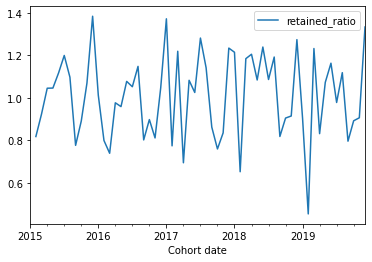

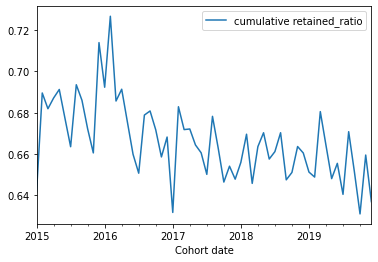

In [13]:
df1.plot(x='Cohort date', y='retained_ratio')
df1.plot(x='Cohort date', y='cumulative retained_ratio')

In [15]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df1['cumulative retained_ratio'])
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -2.87511596213069
p-value: 0.048319137599125844
Critical Values:
	1%: -3.548493559596539
	5%: -2.912836594776334
	10%: -2.594129155766944


In [26]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(df1['cumulative retained_ratio'], order= (1,1,1))
model = arima_model.fit ()
print (model.summary ())

                                   SARIMAX Results                                   
Dep. Variable:     cumulative retained_ratio   No. Observations:                   60
Model:                        ARIMA(1, 1, 1)   Log Likelihood                 158.689
Date:                       Tue, 21 Mar 2023   AIC                           -311.377
Time:                               20:53:23   BIC                           -305.144
Sample:                                    0   HQIC                          -308.944
                                        - 60                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0101      0.186     -0.055      0.957      -0.375       0.354
ma.L1         -0.7974      0.126     -6.311      0.000      -1.045      -0.

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [36]:
# Generating the predicted values
y_pred = model.predict(start=len(df1)-12, end=len(df1)-1, typ='levels')

# Selecting the actual values for the last 12 periods
y_true = df1['cumulative retained_ratio'].tail(12)

# Calculating the difference between actual and predicted values
residuals = y_true - y_pred

# Printing the actual, predicted and residual values
print('Actual:', y_true.values)
print('Predicted:', y_pred.values)
print('Residuals:', residuals.values)

Actual: [0.65121365 0.648791   0.68053007 0.66419517 0.64803132 0.65543992
 0.6404006  0.67079646 0.65148899 0.63091335 0.6594653  0.63686167]
Predicted: [0.65914362 0.65763072 0.65586434 0.66053982 0.66144605 0.6588921
 0.65811756 0.65468056 0.65763745 0.65658755 0.65159454 0.65289964]
Residuals: [-0.00792998 -0.00883972  0.02466574  0.00365534 -0.01341473 -0.00345218
 -0.01771695  0.0161159  -0.00614846 -0.0256742   0.00787076 -0.01603797]


In [43]:
y_pred,y_true

(24    0.659144
 Name: predicted_mean, dtype: float64,
 24    0.651214
 19    0.648791
 39    0.680530
 4     0.664195
 44    0.648031
 34    0.655440
 29    0.640401
 9     0.670796
 59    0.651489
 54    0.630913
 49    0.659465
 14    0.636862
 Name: cumulative retained_ratio, dtype: float64)

In [37]:
# Importing numpy library if not already imported
import numpy as np

# Calculating the RMSE
rmse = np.sqrt(np.mean(residuals**2))

# Printing the RMSE
print('RMSE:', rmse)

RMSE: 0.01456137488525675


In [47]:
y_pred2 = model.predict()

In [48]:
y_pred2

20    0.000000
15    0.641631
35    0.665944
0     0.671819
40    0.676248
30    0.680053
25    0.679552
5     0.676116
55    0.679566
50    0.680997
45    0.679304
10    0.675553
21    0.682877
16    0.685028
36    0.693172
1     0.692065
41    0.691870
31    0.688723
26    0.683027
6     0.676559
56    0.676739
51    0.677551
46    0.676458
11    0.672962
22    0.671898
17    0.664110
37    0.667396
2     0.668403
42    0.669150
32    0.668257
27    0.666737
7     0.663471
57    0.666177
52    0.665673
47    0.661928
12    0.660257
23    0.657790
18    0.657326
38    0.659668
3     0.657083
43    0.658211
33    0.660588
28    0.660097
8     0.660270
58    0.662208
53    0.659448
48    0.657705
13    0.658770
24    0.659144
19    0.657631
39    0.655864
4     0.660540
44    0.661446
34    0.658892
29    0.658118
9     0.654681
59    0.657637
54    0.656588
49    0.651595
14    0.652900
Name: predicted_mean, dtype: float64

In [49]:
df1['Predicted cumulative retained_ratio']= y_pred2

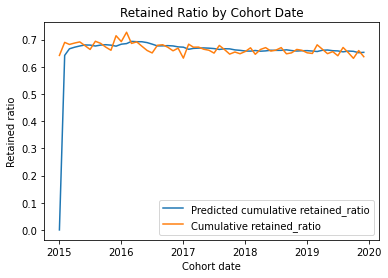

In [55]:
import matplotlib.pyplot as plt

# plot the first data series
plt.plot(df1['Cohort date'], df1['Predicted cumulative retained_ratio'], label='Predicted cumulative retained_ratio')

# plot the second data series
plt.plot(df1['Cohort date'], df1['cumulative retained_ratio'], label='Cumulative retained_ratio')

# add labels and title
plt.xlabel('Cohort date')
plt.ylabel('Retained ratio')
plt.title('Retained Ratio by Cohort Date')

# add legend
plt.legend()

# show the plot
plt.show()
